## Importing Libraries

In [267]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

## Cleaning and setting Dataframe

In [268]:
wines = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline'] 
# I create the columns name based on the file wine.names

In [269]:
f=pd.read_csv('C:\\Users\\Daniele\\Desktop\\HW 4\\wine.data',names=wines)

## Dropping the NaN values

In [270]:
pd.DataFrame.drop(f,['Class'],axis=1,inplace=True)

# I remove the columns class, and I drop the empty space (NaN) replace with 0. 

In [271]:
f.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Standardize to avoid a big influence from variable like Proline and Magnesium

In [272]:
scaler = StandardScaler()

# I standardize to avoid the influence of big variable.

In [273]:
scaled_array = scaler.fit_transform(f)

# I apply the standardization for all the columns of f(dataframe) with the function fit

In [274]:
scaled_data= pd.DataFrame( scaled_array, columns = f.columns )

In [275]:
scaled_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Defining the Kmeans

In [276]:
def Kmeans(array,k):
    
    def initialize_centroids(array,k):
        initial_centroids = np.random.permutation(array.shape[0])[:k]
        centroids = array[initial_centroids]
        return centroids
    
    # I define the initialize centroids that consists of making a random list of centroids.
    
    lis_initial_centroids = initialize_centroids(array,k)
    
    def assign_centroids(array,centroids):
        lis_clustering=[]
        for e in array:
            d_e = []
            for i in range(k):
                d = distance.euclidean(e,centroids[i])
                d_e.append(d)
            min_distance=min(d_e)
            lis_clustering.append((d_e.index(min_distance)+1))
        lis_clustering= np.array(lis_clustering)
        clusters_to_append = lis_clustering.reshape(178,1)   
        new_array = np.append(array,clusters_to_append,axis=1)
        return new_array
    
    # I assign for each data the nearest centroid. Create the clusters.  
    
    new_array = assign_centroids(scaled_array,lis_initial_centroids)
    
    def new_centroids(new_array):
        lis_centroids = []
        centroids = []
        for i in range(k):
            lis_centroids.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == new_array[j][13]:
                    lis_centroids[i].append(new_array[j])
        for i in range(k):
            lis_centroid = lis_centroids[i]
            lis_centroid = np.delete(lis_centroid,13,axis=1)
            new_centroid = np.mean(lis_centroid,axis=0)
            centroids.append(new_centroid)
        return centroids
    
    # I calculate the mean for each clusters. Make the new centroids.
   
    centroids = new_centroids(new_array)
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def update_centroids(initial_centroids):
        centroids_old = np.zeros((k,12))
        centroids = initial_centroids
        numItem = 0
        while ([list(elem) for elem in centroids_old] != [list(elem) for elem in centroids]):
            numItem += 1
            centroids_old = centroids.copy()
            new_array = assign_centroids(scaled_array,centroids_old)
            centroids = new_centroids(new_array)
        return numItem,centroids,centroids_old
    
    # Update_centroids,needs to repeat the reassignment of new_centroids until the old_centroids = new_centorids.
    
    numItem = update_centroids(lis_initial_centroids)[0]
    
    # numItem is the nums of iterations that happens until old_centroids = new_centorids
    
    centroids = update_centroids(lis_initial_centroids)[1]
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def clustering(array):
        lis_clusters = []
        clusters = []
        for i in range(k):
            lis_clusters.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == array[j][13]:
                    lis_clusters[i].append(array[j])
        for i in range(k):
            cluster = lis_clusters[i]
            cluster = np.delete(cluster,13,axis=1)
            clusters.append(cluster)
        return clusters
    
    # Reassign data to the new_centroids.
    
    clusters = clustering(final_array)
    
    def dissimilarity(clusters,centroids):
        Dist = []
        for c in range (len(clusters)):
            Dist_cluster = ([])
            for e in clusters[c]:
                Dist_cluster += [(distance.euclidean(e,centroids[c]))**2]
            Dist += [Dist_cluster]
        final_dist = []
        for e in Dist:
            e = (sum(e))
            final_dist += [e]
        totDist = (sum(final_dist))
        return totDist
    
    # Clculate dissimilarity, the total distance from each data and its own centroids. 
    
    totDist = dissimilarity(clusters,centroids)
    
    return totDist,clusters,centroids,final_array

In [277]:
results = Kmeans(scaled_array,3)

## Defining TryKmeans, that we need to repeat a lot of time the k-means. This allowed us to take better centroids and to decrease dissimilarity. More we increase the repetitions numer lower will be dissimilarity and more reliable will be the clusters.

In [278]:
def tryKmeans(rep):
    best = Kmeans(scaled_array,3)
    minDissimilarity = best[0]
    for trial in range(rep):
        result = Kmeans(scaled_array,3)
        currDissimilarity = result[0]
        if currDissimilarity < minDissimilarity:
            best = result
            minDissimilarity = currDissimilarity       
    return best
    
# Try Kmeans consist on the repetition of K-means and the results is the best Kmeans otherwise the Kmeans with smaller dissimilarity.

In [279]:
best = tryKmeans(10)

## Defining Elbow Method that we need to optimized k variable of K-means

In [280]:
def elbowMethod(rep):
    Tot_dissimilarity = []
    for i in range(1,rep):
        dissimilarity = (Kmeans(scaled_array,i)[0],i)
        Tot_dissimilarity += [dissimilarity]
        
    return Tot_dissimilarity

# The elbow method calculate the dissimilarity for increasing k. The aim is the optimization of k. 

In [281]:
elbow = elbowMethod(11)

In [282]:
elbow

# How can we see the main difference is beetween 2 and 3. 

[(2313.9999999999986, 1),
 (1659.0079672511504, 2),
 (1277.9284888446423, 3),
 (1186.245061963394, 4),
 (1124.1416172261345, 5),
 (1089.0414496926464, 6),
 (997.246874682327, 7),
 (959.2216440748958, 8),
 (955.7338127430248, 9),
 (923.4899407727262, 10)]

## How Elbow Method underline the cost decrease drastically from k = 2 to k = 3, for this reason k = 3 is the best k that we can take

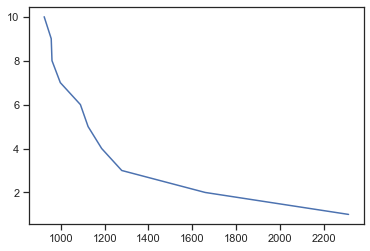

In [283]:
X = []
Y = []
for elem in elbow:
    X += [elem[0]]
    Y += [elem[1]]
pl.plot(X, Y)              
pl.show()    

## Reassigning the data to respective clusters, arranging new Dataframe.

In [284]:
final_cluster = []
for i in best[3]:
    final_cluster += [i[13]]

In [285]:
final_cluster = pd.DataFrame(final_cluster,columns = ['cluster'])

In [288]:
df = scaled_data.join(final_cluster)

In [286]:
main_df = f.join(final_cluster)

In [287]:
main_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.0


In [290]:
main_df = main_df.set_index(main_df['cluster'])

In [291]:
main_df = main_df.sort_index()

In [292]:
main_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,cluster
cluster,,,,,,,,,,,,,,
1.0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1.0
1.0,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235,1.0
1.0,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095,1.0
1.0,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920,1.0
1.0,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,1.0


## Analizing the features

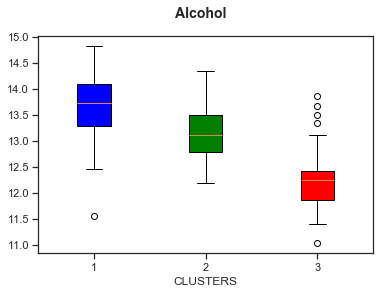

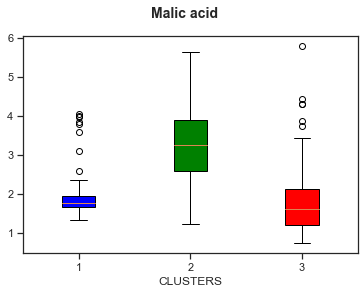

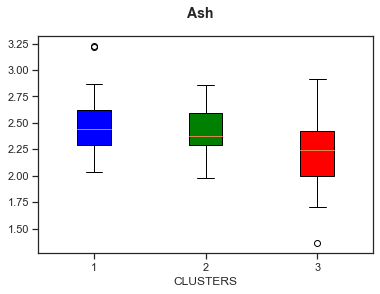

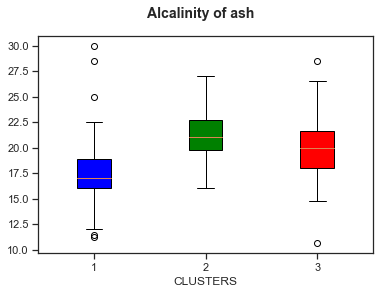

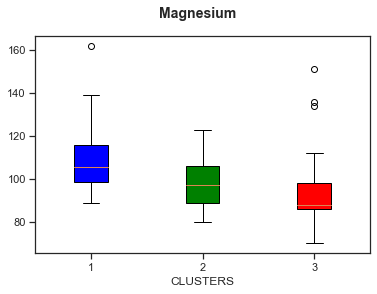

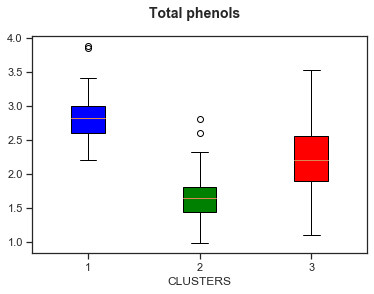

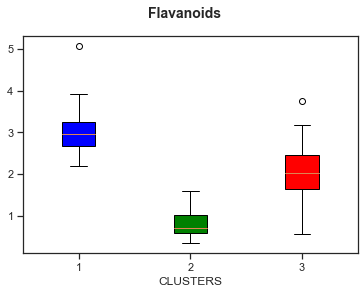

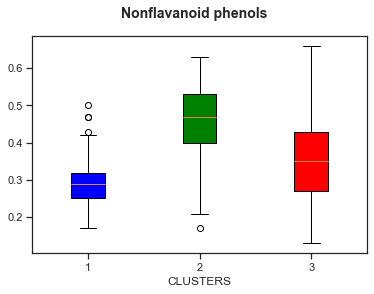

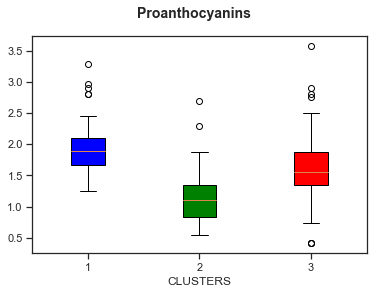

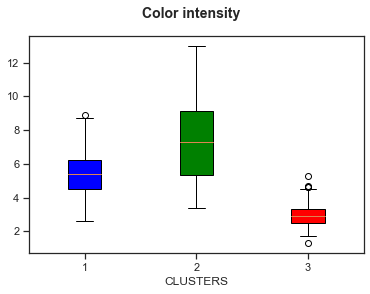

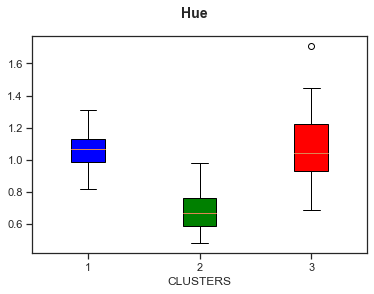

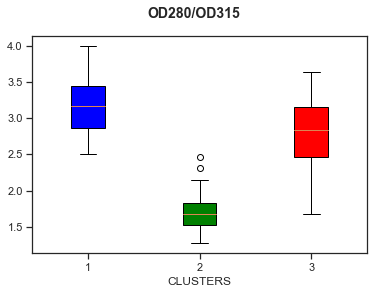

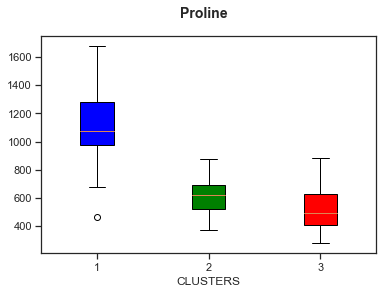

In [293]:
for i in range(1,len(wines)):
    c_1 = (main_df.loc[1.0,[wines[i]]]).values.tolist()
    c_2 = (main_df.loc[2.0,[wines[i]]]).values.tolist()
    c_3 = (main_df.loc[3.0,[wines[i]]]).values.tolist()
    x = [c_1,c_2,c_3]
    fig = plt.figure()
    fig.suptitle(wines[i], fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.set_xlabel('CLUSTERS')
    box = plt.boxplot(x, patch_artist=True)
    colors = ['blue', 'green','red']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.show()

## How can we see for example in the color intensity and in Alcohol, the clusters have different characteristics.

## Seaborn Pairplot

C:\Users\Daniele\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Daniele\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


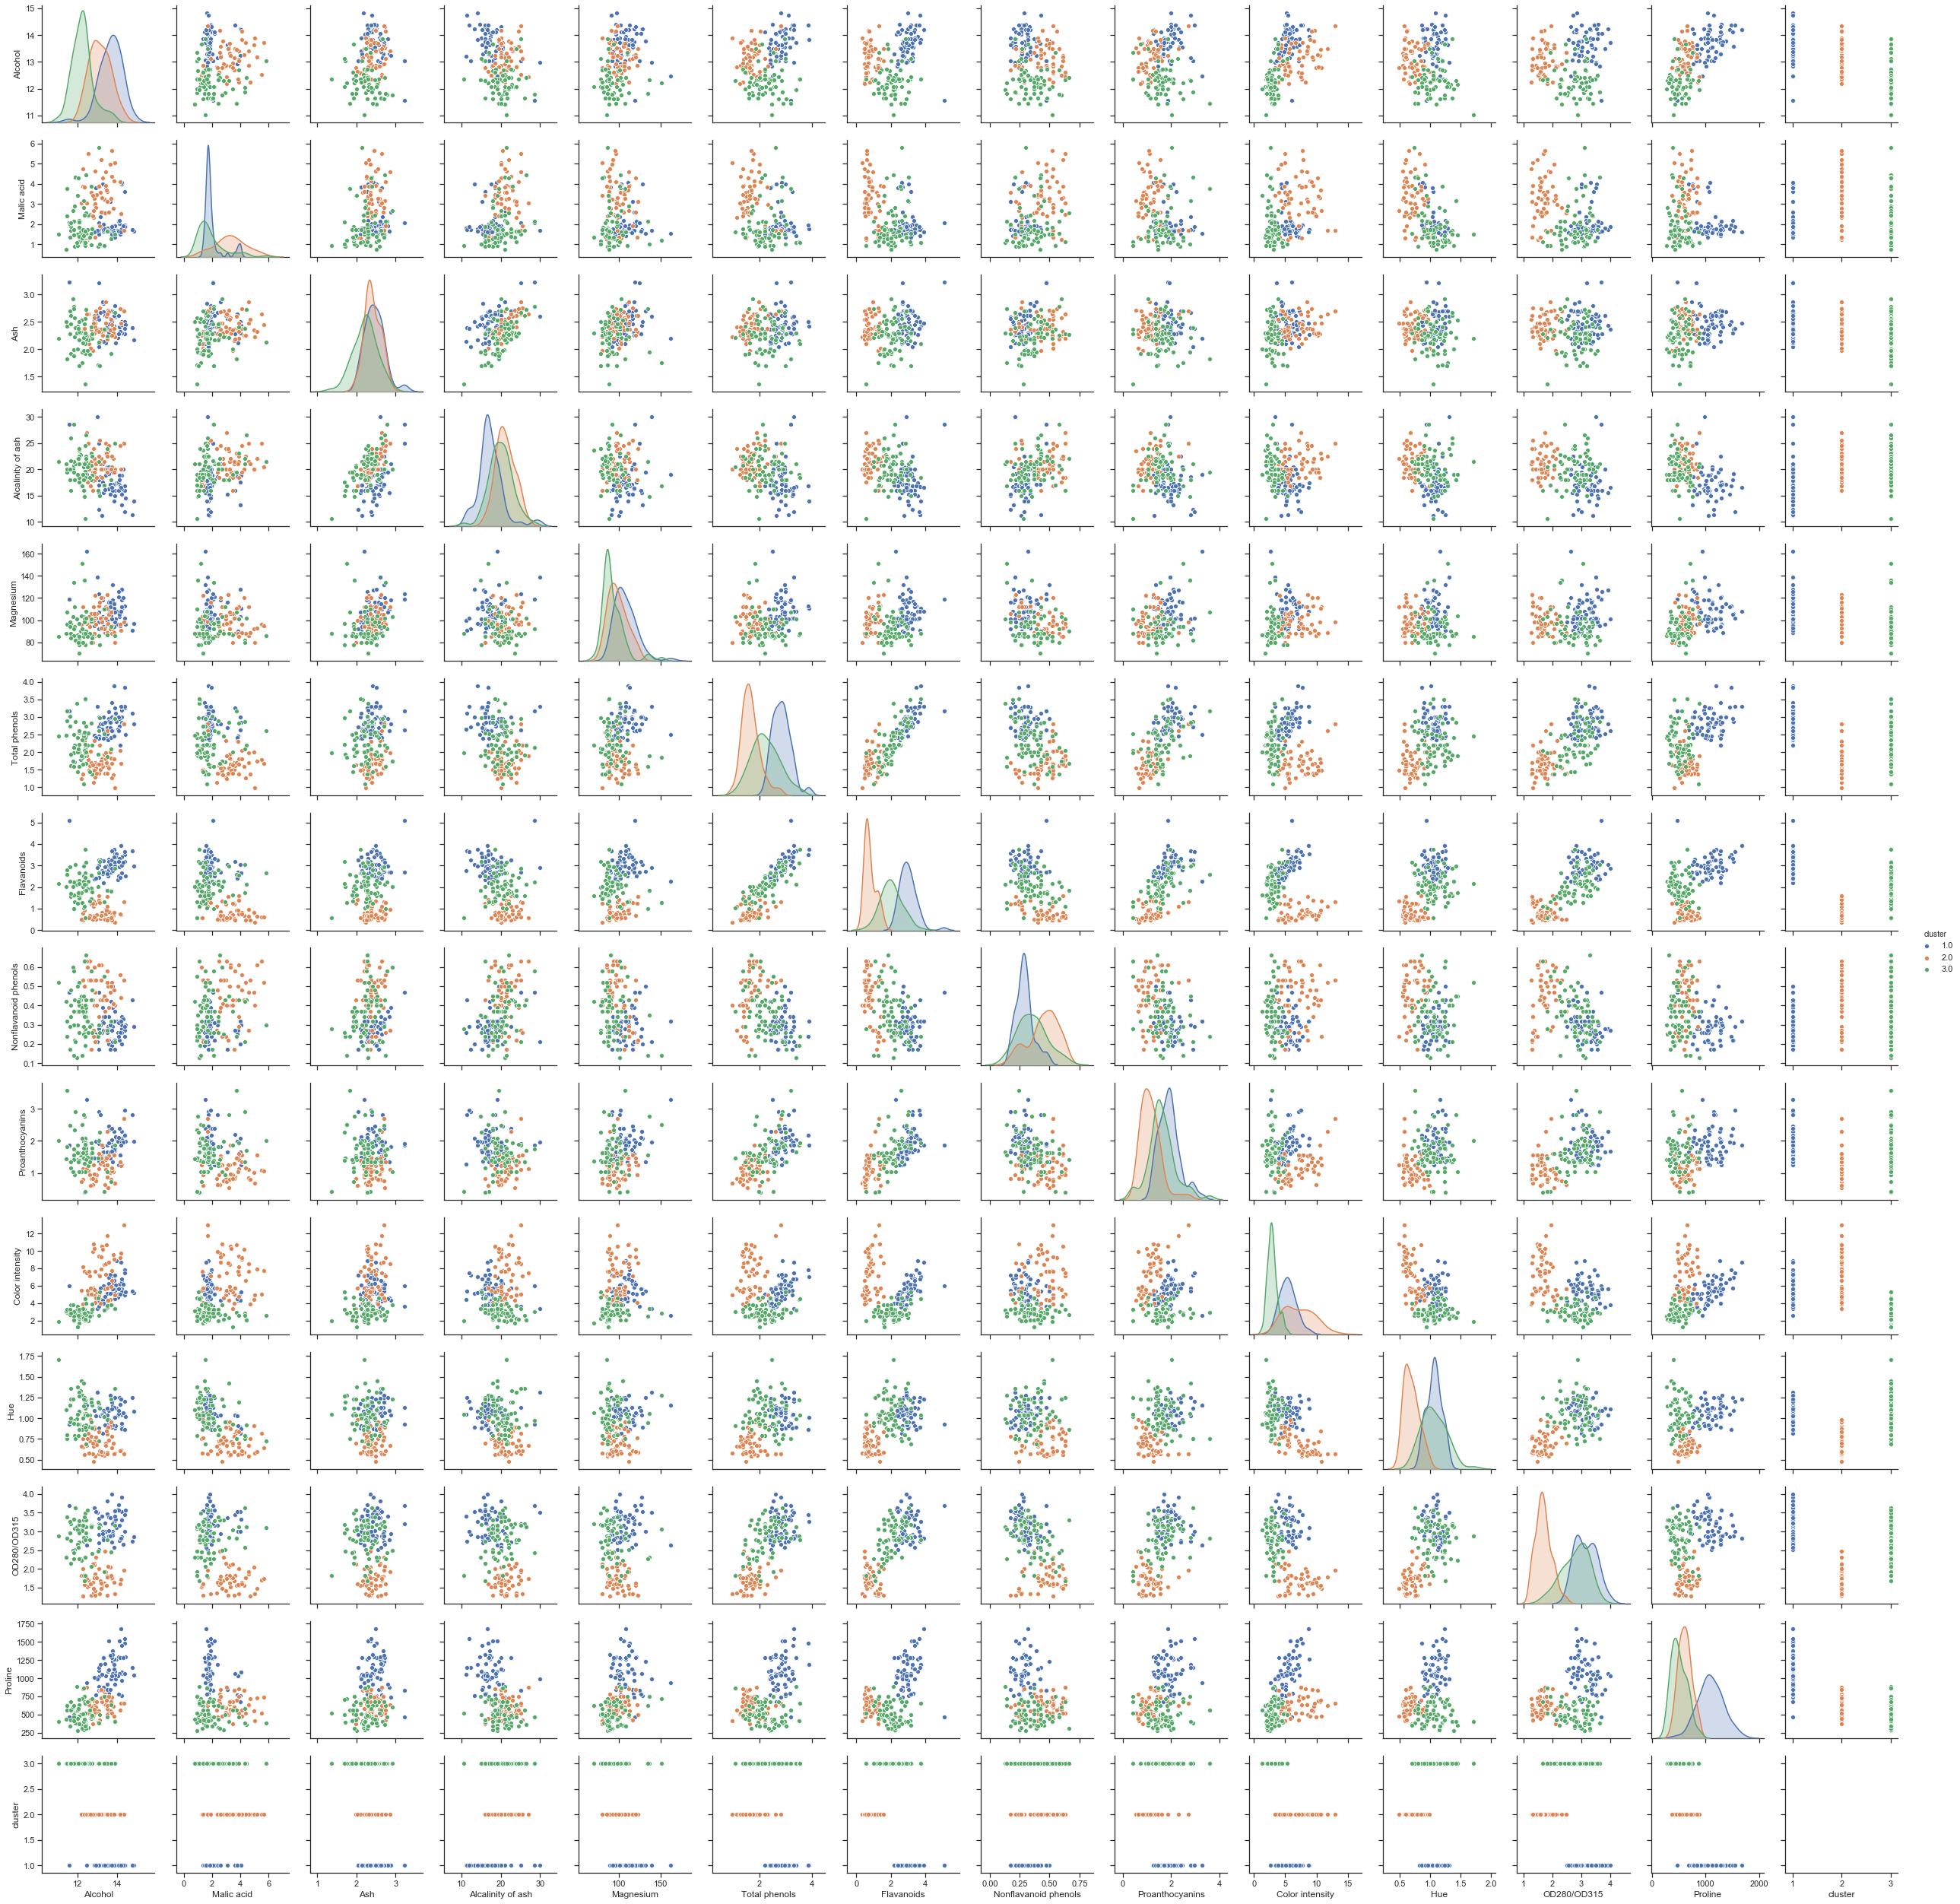

In [294]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(main_df,hue = 'cluster')
plt.show()